## A. Data Exploration

**Numerical Attributes**:
- ID: Patient identifier 
- Age: Age of the patient (in years)
- Schooling: time the patient spent in school (in years)

**Categorical Attributes**:
- Gender: 1 = male, 2 = female
- Breastfeeding: 1 = yes, 2 = no, 3 = unknown
- Varicella (chickenpox): 1 = positive, 2 = negative, 3 = unknown
- Initial_Symptoms: 1 = visual, 2 = sensory, 3 = motor, 4 = other, 5 = visual and sensory, 6 = visual and motor, 7 = visual and others, 8 = sensory and motor, 9 = sensory and other, 10 = motor and other, 11 = Visual, sensory and motor, 12 = visual, sensory and other, 13 = Visual, motor and other, 14 = Sensory, motor and other, 15 = visual,sensory,motor and other
- Mono_or_Polysymptomatic: 1 = monosymptomatic, 2 = polysymptomatic, 3 = unknown
- Oligoclonal_Bands: 0 = negative, 1 = positive, 2 = unknown
- LLSSEP: 0 = negative, 1 = positive
- ULSSEP:0 = negative, 1 = positive
- VEP:0 = negative, 1 = positive
- BAEP: 0 = negative, 1 = positive
- Periventricular_MRI: 0 = negative, 1 = positive
- Cortical_MRI: 0 = negative, 1 = positive
- Infratentorial_MRI:0 = negative, 1 = positive
- Spinal_Cord_MRI: 0 = negative, 1 = positive
- initial_EDSS: only exists for group 1
- final_EDSS: only exists for group 1

**Target Variable**:

Group: 
- 1 = CDMS (clinically defined multiple sclerosis), 
- 2 = non-CDMS (not clinically defined multiple sclerosis)

### Importing Libraries & Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Desktop/conversion_predictors_of_clinically_isolated_syndrome_to_multiple_sclerosis.csv")

In [3]:
df.head()

,Unnamed: 0,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
0,0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1.0,1.0,1
1,1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,2.0,2.0,1
2,2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1.0,1.0,1
3,3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1.0,1.0,1
4,4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1.0,1.0,1


In [4]:
df.tail()

,Unnamed: 0,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
268,268,2,31,8.0,3,1,9.0,2,0,0,0,0,0,0,0,0,0,NaN,NaN,2
269,269,1,21,15.0,3,3,5.0,2,1,0,0,0,0,0,0,0,1,NaN,NaN,2
270,270,2,19,12.0,3,3,13.0,2,0,1,1,1,0,0,0,0,1,NaN,NaN,2
271,271,2,32,15.0,3,3,15.0,2,1,1,1,1,0,1,1,1,0,NaN,NaN,2
272,272,2,77,6.0,3,3,2.0,1,0,0,1,0,0,0,0,0,0,NaN,NaN,2


Most of the attributes (Gender, Breastfeeding, Varicella,Initial_Symptoms, Oligoclonal_Bands, LLSSEP, ULSSEP, VEP, BAEP, Periventricular_MRI, Cortical_MRI, Infratentorial_MRI, Spinal_Cord_MRI) are categorical, but they have already been converted to numerical attributes.

The last attribute group indicates whether the patient belongs to a certin group. This attribute would be a primary candidate for an attribute to learn to predict from the values of the other attributes.

In [5]:
df.shape

(273, 20)

Dataset consists of 273 observations (rows) and 20 features (columns).

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               273 non-null    int64  
 1   Gender                   273 non-null    int64  
 2   Age                      273 non-null    int64  
 3   Schooling                272 non-null    float64
 4   Breastfeeding            273 non-null    int64  
 5   Varicella                273 non-null    int64  
 6   Initial_Symptom          272 non-null    float64
 7   Mono_or_Polysymptomatic  273 non-null    int64  
 8   Oligoclonal_Bands        273 non-null    int64  
 9   LLSSEP                   273 non-null    int64  
 10  ULSSEP                   273 non-null    int64  
 11  VEP                      273 non-null    int64  
 12  BAEP                     273 non-null    int64  
 13  Periventricular_MRI      273 non-null    int64  
 14  Cortical_MRI             2

Dataset has only float and integer values. 

In [7]:
df.isna().sum()

Unnamed: 0                   0
Gender                       0
Age                          0
Schooling                    1
Breastfeeding                0
Varicella                    0
Initial_Symptom              1
Mono_or_Polysymptomatic      0
Oligoclonal_Bands            0
LLSSEP                       0
ULSSEP                       0
VEP                          0
BAEP                         0
Periventricular_MRI          0
Cortical_MRI                 0
Infratentorial_MRI           0
Spinal_Cord_MRI              0
Initial_EDSS               148
Final_EDSS                 148
group                        0
dtype: int64

- Attribute Schooling has one missing value.
- Attribute Initial Symption has one missing value.
- Attribute Initial_EDSS has 148 missing values.
- Attribute Final_EDSS has 148 missing values.

In [8]:
df.isnull().sum() / len(df) * 100

Unnamed: 0                  0.000000
Gender                      0.000000
Age                         0.000000
Schooling                   0.366300
Breastfeeding               0.000000
Varicella                   0.000000
Initial_Symptom             0.366300
Mono_or_Polysymptomatic     0.000000
Oligoclonal_Bands           0.000000
LLSSEP                      0.000000
ULSSEP                      0.000000
VEP                         0.000000
BAEP                        0.000000
Periventricular_MRI         0.000000
Cortical_MRI                0.000000
Infratentorial_MRI          0.000000
Spinal_Cord_MRI             0.000000
Initial_EDSS               54.212454
Final_EDSS                 54.212454
group                       0.000000
dtype: float64

- More than 50% missing values for Initial_EDSS and for Final_EDSS

In [9]:
# Get column names
column_names = df.columns
print(column_names)

Index(['Unnamed: 0', 'Gender', 'Age', 'Schooling', 'Breastfeeding',
       'Varicella', 'Initial_Symptom', 'Mono_or_Polysymptomatic',
       'Oligoclonal_Bands', 'LLSSEP', 'ULSSEP', 'VEP', 'BAEP',
       'Periventricular_MRI', 'Cortical_MRI', 'Infratentorial_MRI',
       'Spinal_Cord_MRI', 'Initial_EDSS', 'Final_EDSS', 'group'],
      dtype='object')


In [10]:
# Also check if the column is unique
for i in column_names:
  print('{} is unique: {}'.format(i, df[i].is_unique))

Unnamed: 0 is unique: True
Gender is unique: False
Age is unique: False
Schooling is unique: False
Breastfeeding is unique: False
Varicella is unique: False
Initial_Symptom is unique: False
Mono_or_Polysymptomatic is unique: False
Oligoclonal_Bands is unique: False
LLSSEP is unique: False
ULSSEP is unique: False
VEP is unique: False
BAEP is unique: False
Periventricular_MRI is unique: False
Cortical_MRI is unique: False
Infratentorial_MRI is unique: False
Spinal_Cord_MRI is unique: False
Initial_EDSS is unique: False
Final_EDSS is unique: False
group is unique: False


Attribute Unnamed is unique. It is an ID column. 

### Univariate Analysis

We will now explore the independent variables and the target variable of the dataset separately.

### 1. Independent Variables

We will now explore some of the independent variables of the dataset separately.

### a) Numerical Attribute Age

 We will look at the range and the central tendency of the numerical attribute age.

In [11]:
df['Age'].describe()

count    273.000000
mean      34.062271
std       11.114369
min       15.000000
25%       25.000000
50%       33.000000
75%       40.000000
max       77.000000
Name: Age, dtype: float64

The mean age is greater than Median age. Therefore, distribution is positively skewed (right skewed).

The youngest patient is 15 years old and the oldest patient is 77 years old.

25% of the patients are below 25 years old and 75 % of the patients are above 25 years old (25% percentile). 50% of the patients are below 33 years old and 50% of the patients are above 33 years old (median). 75 % of the patients are below 40 and 25 % of the patients are above 40 years old (75% percentile).

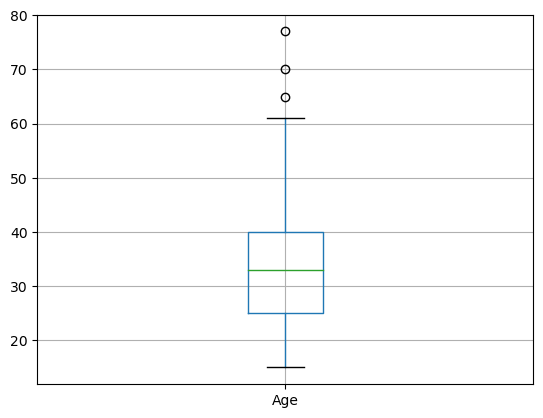

In [12]:
df.boxplot(column='Age')
plt.show()

There are some patients that are over 60 years old (outliers) in the dataset.

<AxesSubplot:xlabel='Age', ylabel='Count'>

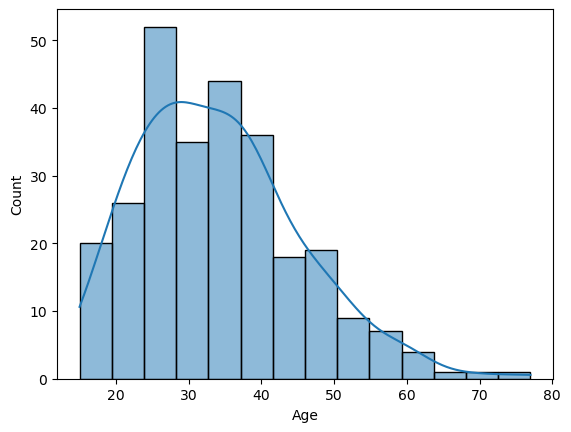

In [13]:
sns.histplot(df, x="Age", kde=True)

The distribution is positively skewed (right skewed).

Most of the patients are between 25 and 40 years old.

Age ranges from 15 to almost 80 years old.

### b) Categorical Attributes 

Unfortuantely, we cannot use `df['Breastfeeding'].describe()` for the converted categorical attributes, because the attribute has already been converted to a numerical attribute, even though it is a categorical attribute. We can only use `df['Breastfeeding'].value_counts()` for all converted categorical attributes.

In [14]:
df['Breastfeeding'].value_counts()

1    131
3     85
2     57
Name: Breastfeeding, dtype: int64

131 patients have been breastfed. 57 patients have not been breastfed. For 85 patients we do not know whether they were breastfed.

In [15]:
df['Varicella'].value_counts()

1    124
2    104
3     45
Name: Varicella, dtype: int64

124 patients are positive. 104 are patients negative. For 45 patients we don't know whether they are positive or negative.

In [16]:
df['Initial_Symptom'].value_counts()

8.0     39
3.0     32
1.0     31
4.0     30
2.0     26
6.0     17
10.0    15
14.0    14
5.0     13
15.0    11
13.0    11
11.0    10
7.0      9
9.0      8
12.0     6
Name: Initial_Symptom, dtype: int64

Most of the patients (39) had sensory and motoric symptoms followed by motoric symptoms (32 patients),and visual symptoms (31 patients).

### 1. Target Variable

In [17]:
df.group.unique()

array([1, 2])

It is a classification problem.

In [18]:
 # As it is a categorical variable, we will look at its frequency table, percentage distribution and bar plot.
df.group.value_counts()

2    148
1    125
Name: group, dtype: int64

125 patients have CDMS, while 148 patients don't have it.

In [19]:
# Normalize can be set to True to print proportions instead of number 
df.group.value_counts(normalize=True)

2    0.542125
1    0.457875
Name: group, dtype: float64

45.79 % of the patients have CDMS, while 54.54 % of the patients don't have it.

<AxesSubplot:xlabel='group', ylabel='count'>

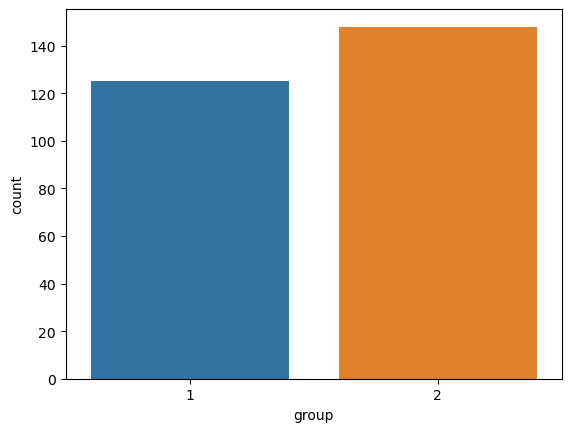

In [20]:
sns.countplot(x=df["group"])

### Bivariate Analysis

<AxesSubplot:xlabel='group', ylabel='count'>

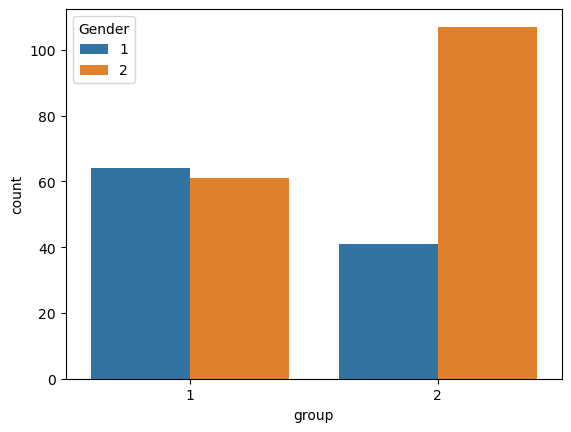

In [21]:
sns.countplot(data=df, x="group", hue="Gender")

The ratio male to female patients with CDMS is almost the same. There are a little bit more male patients than female patients.

<AxesSubplot:xlabel='group', ylabel='count'>

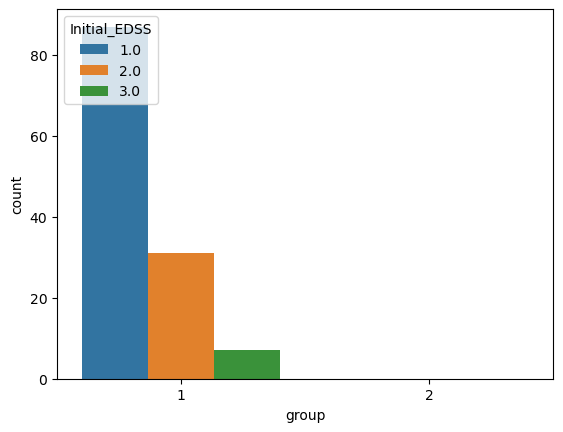

In [22]:
sns.countplot(data=df, x="group", hue="Initial_EDSS")

All missing values of attribute Initial_EDSS are related to group 2 (Non-CDMS). For group 1 (CMDS) values are not missing. I assume that the data is missing on purpose. In other words, it is data that is missing because it should not exist (structurally missing data). It looks like that this attribute has an influence on the target variable.

<AxesSubplot:xlabel='group', ylabel='count'>

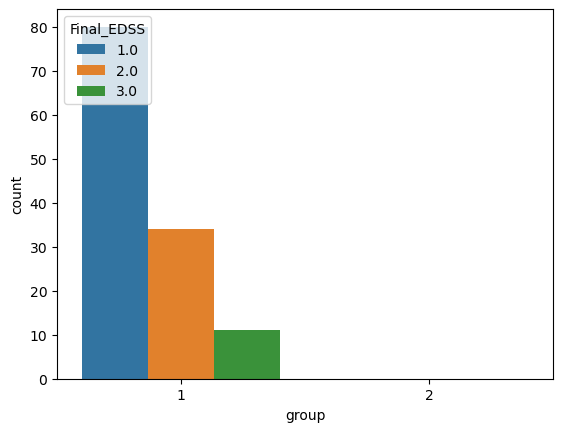

In [23]:
sns.countplot(data=df, x="group", hue="Final_EDSS")

All missing values of attribute Final_EDSS are related to group 2 (Non-CDMS). For group 1 (CMDS) values are not missing. I assume that the data is missing on purpose. In other words, it is data that is missing because it should not exist (structurally missing data). It looks like that this attribute has an influence on the target variable.

<AxesSubplot:xlabel='group', ylabel='count'>

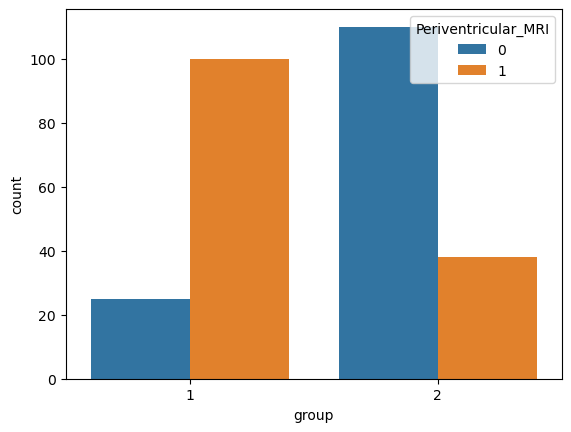

In [24]:
sns.countplot(data=df, x="group", hue="Periventricular_MRI")

For the CDMS group petriventicular MRI was more often positive than it was negative. For Non-CDMS group petriventicular MRI was more often negative than it was postive. It looks like that the attribute petriventicular MRI has an influence on the target variable.

<AxesSubplot:xlabel='group', ylabel='count'>

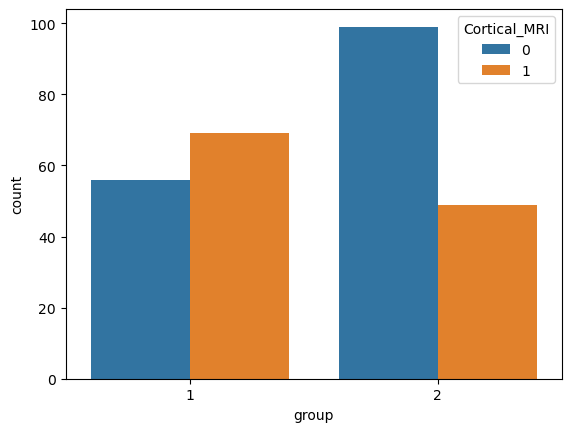

In [25]:
sns.countplot(data=df, x="group", hue="Cortical_MRI")

There are slighly more positive cortical MRIs than negatives cortical MRIs for the CDMS group, but the difference is not huge. There are more negative than positive cortical MRIs for the Non-CDMS group. However, it doesn't look like that this attribute has a strong influence on the target variable.

<AxesSubplot:xlabel='group', ylabel='count'>

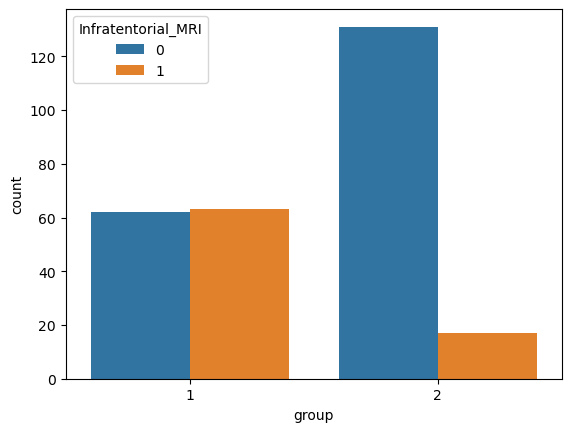

In [26]:
sns.countplot(data=df, x="group", hue="Infratentorial_MRI")

There are almost the same number of positive infratentorial MRIs than negatives infratentorial MRIs for the CDMS group. There are more negative infratentorial MRIs than postive infratentorial MRIs for the non-CDMS group. However, it doesn't look like that this attribute has a strong influence on the target variable.

<AxesSubplot:xlabel='group', ylabel='count'>

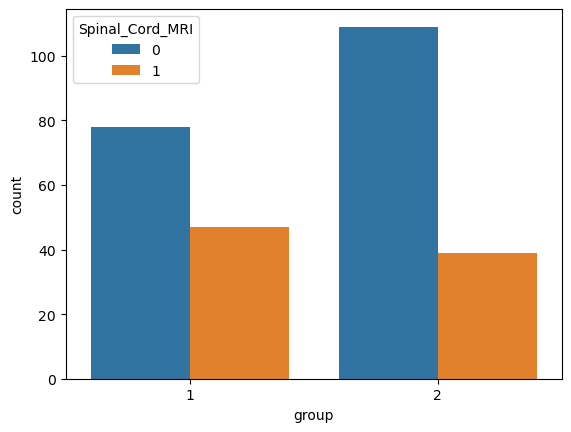

In [27]:
sns.countplot(data=df, x="group", hue="Spinal_Cord_MRI")

Positive Spinal_Cord_MRI's are almost the same for both groups CDMS vs. Non-CDMS. It doesn't look that this attribute has an influence on the target variable.

<AxesSubplot:xlabel='group', ylabel='count'>

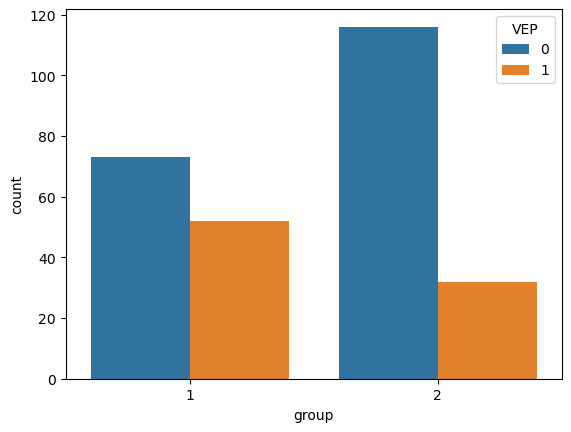

In [28]:
sns.countplot(data=df, x="group", hue="VEP")

It doesn't look that the VEP test has an influence on the target variable.

<AxesSubplot:xlabel='group', ylabel='count'>

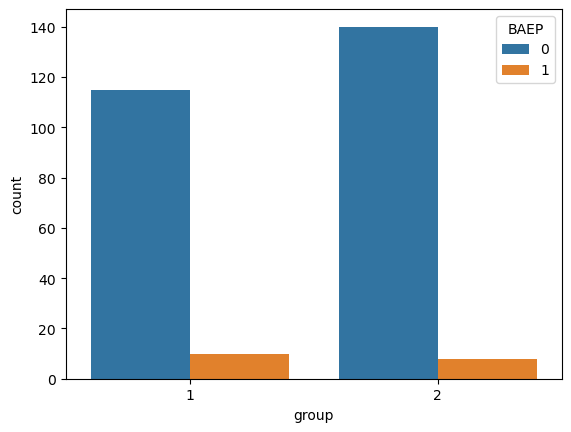

In [29]:
sns.countplot(data=df, x="group", hue="BAEP")

It doesn't look like that the BAEP test has an influence on the target variable.

<AxesSubplot:xlabel='group', ylabel='count'>

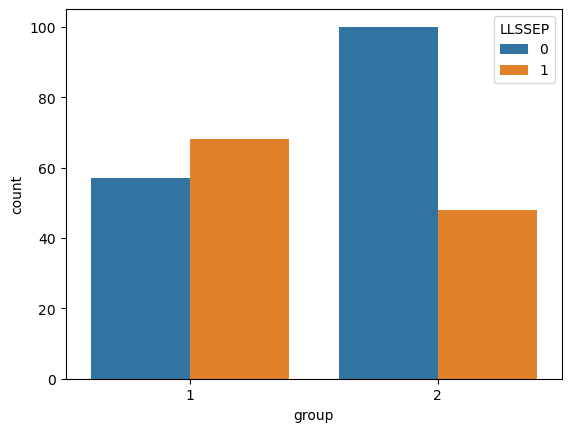

In [30]:
sns.countplot(data=df, x="group", hue="LLSSEP")

<AxesSubplot:xlabel='group', ylabel='count'>

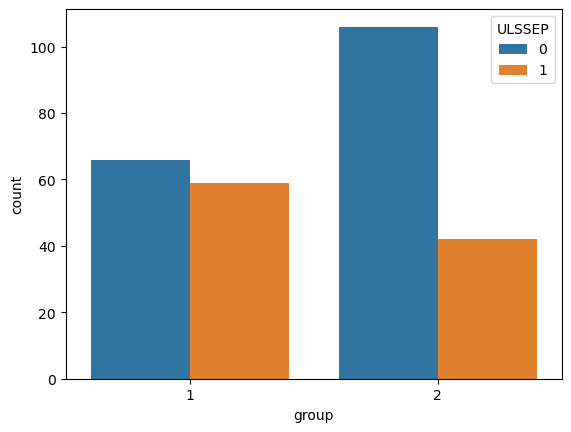

In [31]:
sns.countplot(data=df, x="group", hue="ULSSEP")

<AxesSubplot:xlabel='group', ylabel='count'>

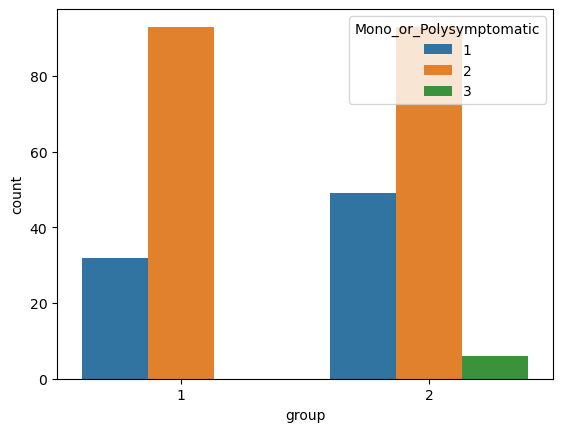

In [32]:
sns.countplot(data=df, x="group", hue="Mono_or_Polysymptomatic")

<AxesSubplot:xlabel='group', ylabel='count'>

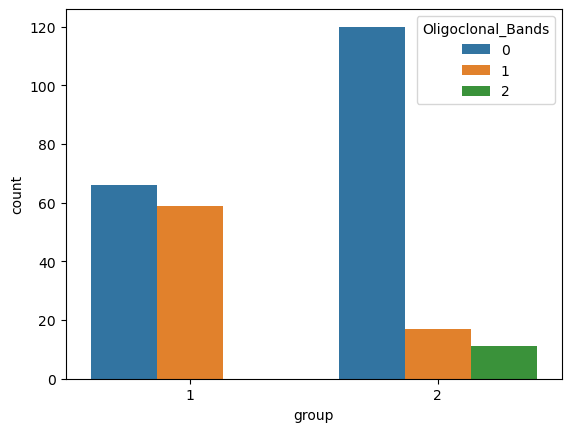

In [33]:
sns.countplot(data=df, x="group", hue="Oligoclonal_Bands")

<AxesSubplot:xlabel='group', ylabel='count'>

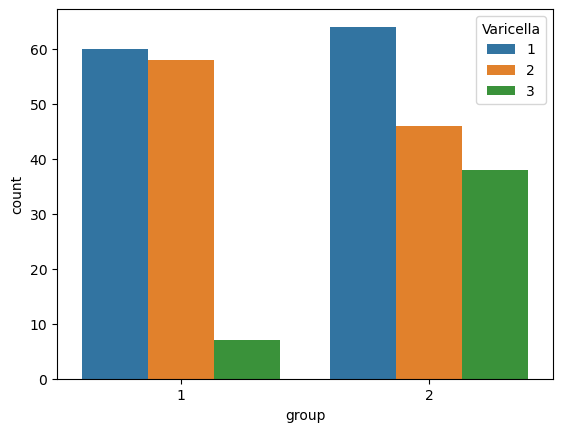

In [34]:
sns.countplot(data=df, x="group", hue="Varicella")

### Multivariate Analysis

<AxesSubplot:>

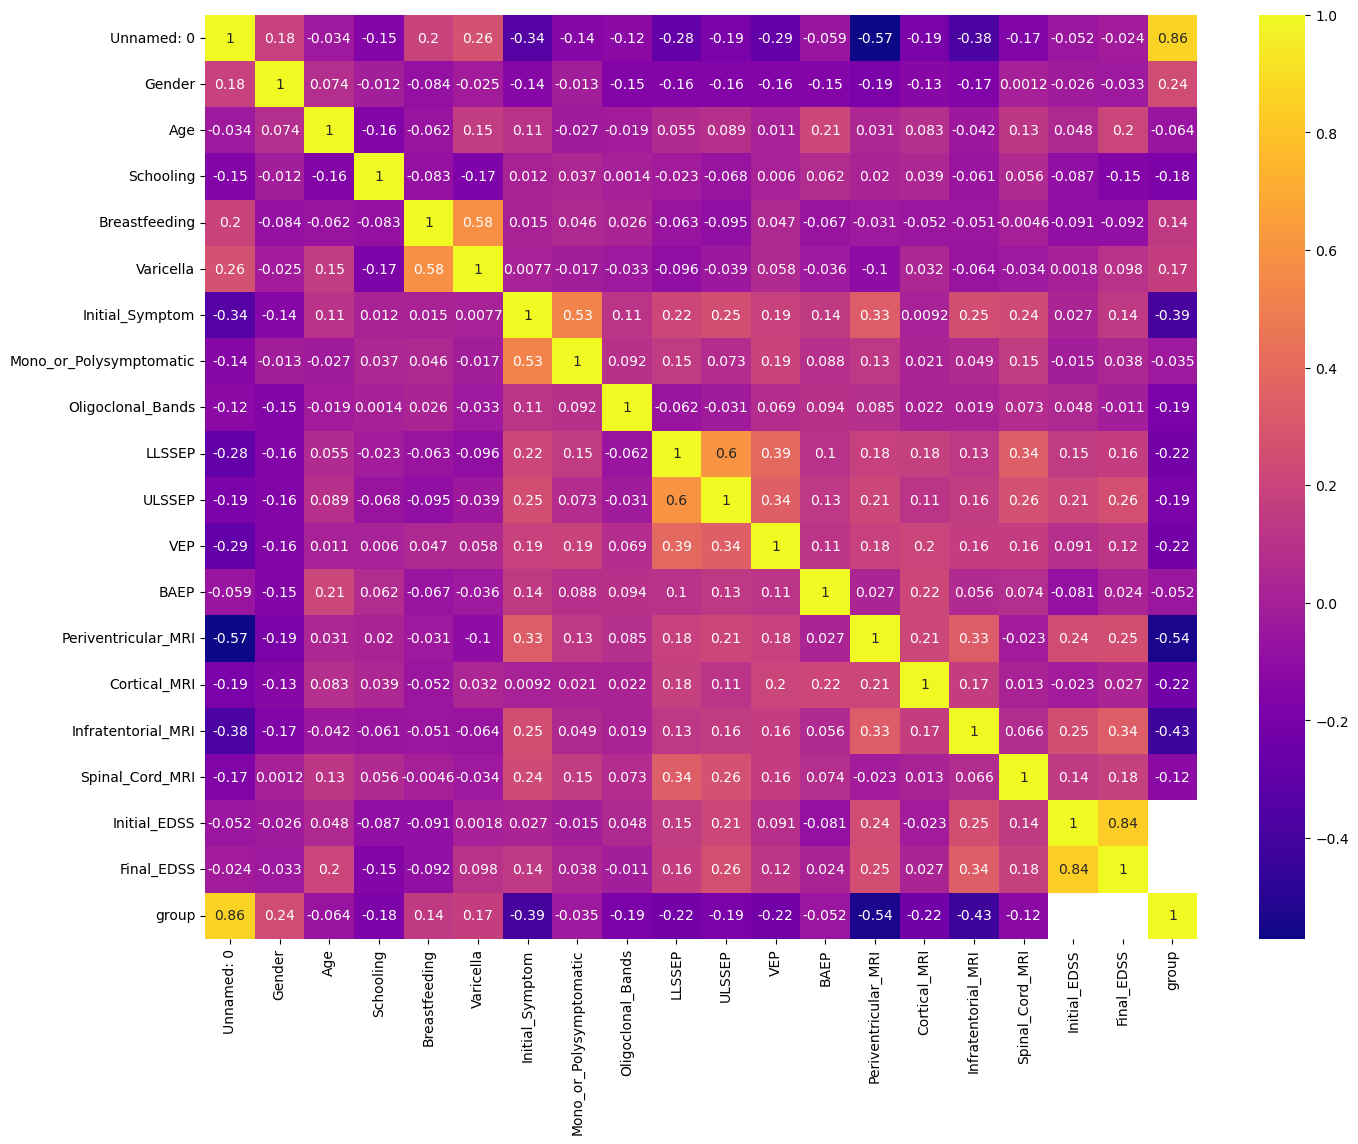

In [35]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(),annot=True,cmap='plasma')

The heat map suggests correlation greater than 0 between `Final_EDSS` and `Initial_EDSS` (0.96), `Initial_EDSS` and `Petriventricular_MRI` (0.53), `Final_EDSS` and `Petriventricular_MRI` (0.53), `Initial_EDSS` and `Infratentorial_MRI` (0.46) and `Final_EDSS` and `Infratentorial_MRI` (0.49), `LLSSEP` and `ULSSEP` (0.6). 

### Splitting Dataset into Subsets

The objective of this study is the influence of the variables on the target variable (if the patients belongs to group CDMS or not).

We will split the data into two subsets:
- df1 Subset : All samples with value CDMS
- df2 Subset: All samples with value Non-CDMS

In [36]:
df1 = df[df.group==1]
df2 = df[df.group==2]

Text(0.5, 1.0, 'Boxplot for Age by Group')

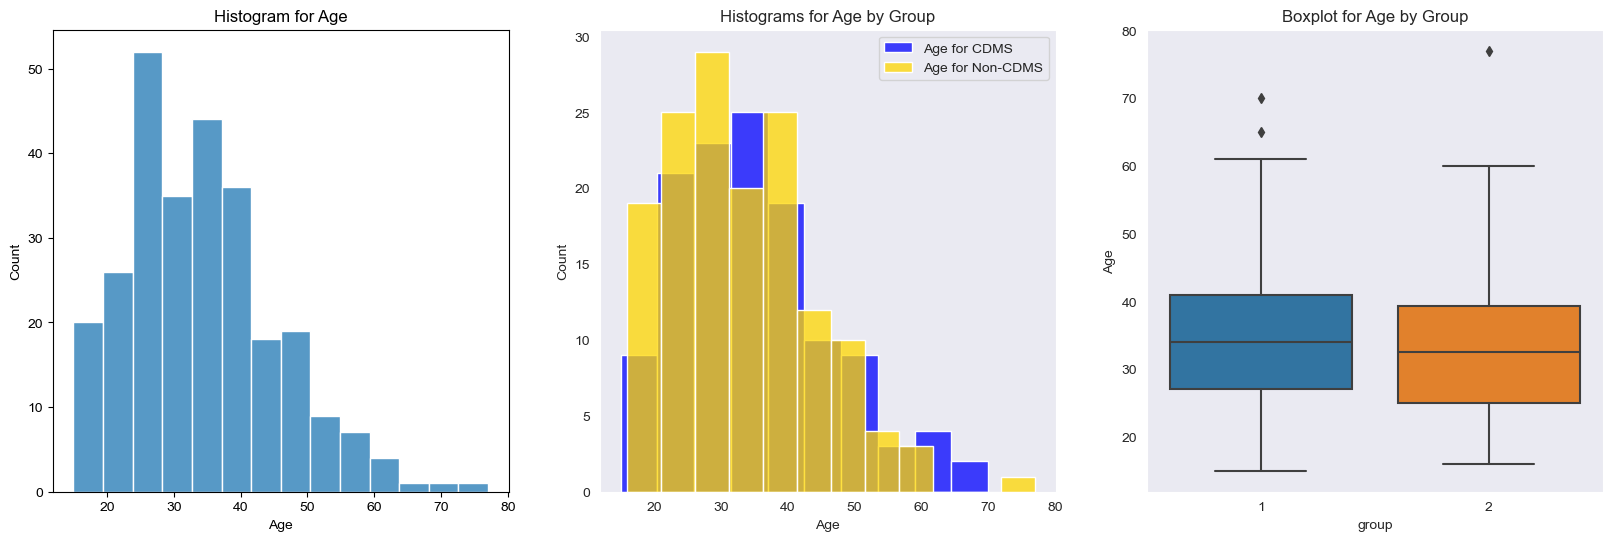

In [37]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for Age")
sns.histplot(df.Age,kde=False)
plt.subplot(1,3,2)
sns.histplot(df1.Age,kde=False,color="Blue", label="Age for CDMS")
sns.histplot(df2.Age,kde=False,color = "Gold", label = "Age for Non-CDMS")
plt.title("Histograms for Age by Group")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=df.group,y=df.Age)
plt.title("Boxplot for Age by Group")

## B. Data Preparation

We will drop the ID column from the dataset.

In [38]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.tail()

,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
268,2,31,8.0,3,1,9.0,2,0,0,0,0,0,0,0,0,0,NaN,NaN,2
269,1,21,15.0,3,3,5.0,2,1,0,0,0,0,0,0,0,1,NaN,NaN,2
270,2,19,12.0,3,3,13.0,2,0,1,1,1,0,0,0,0,1,NaN,NaN,2
271,2,32,15.0,3,3,15.0,2,1,1,1,1,0,1,1,1,0,NaN,NaN,2
272,2,77,6.0,3,3,2.0,1,0,0,1,0,0,0,0,0,0,NaN,NaN,2


We decided not to drop the attributes Initial_EDSS and Final_EDSS, because we have found that those attributes are missing on purpose. We will fill the missing values with zeros.

In [39]:
df['Initial_EDSS'] = df['Initial_EDSS'].fillna(0)
df['Final_EDSS'] = df['Final_EDSS'].fillna(0)
df.tail()

,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
268,2,31,8.0,3,1,9.0,2,0,0,0,0,0,0,0,0,0,0.0,0.0,2
269,1,21,15.0,3,3,5.0,2,1,0,0,0,0,0,0,0,1,0.0,0.0,2
270,2,19,12.0,3,3,13.0,2,0,1,1,1,0,0,0,0,1,0.0,0.0,2
271,2,32,15.0,3,3,15.0,2,1,1,1,1,0,1,1,1,0,0.0,0.0,2
272,2,77,6.0,3,3,2.0,1,0,0,1,0,0,0,0,0,0,0.0,0.0,2


Since the attributes Schooling and Initial_Symptom are categorical attributes, we will replace the missing values with the mode.

In [40]:
df['Schooling'] = df['Schooling'].fillna(df['Schooling'].mode()[0])

In [41]:
df['Initial_Symptom'] = df['Initial_Symptom'].fillna(df['Initial_Symptom'].mode()[0])

## C. Feature Selection

We will use chi-square to select the n_features with the highest values for the test chi-squared statistic from X. 

In [42]:
from sklearn.feature_selection import chi2

We will select all attributes except the last attribute and assign it to X. We will select the last attribute and assign it to y.

In [43]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [44]:
X.values

array([[ 1., 34., 20., ...,  1.,  1.,  1.],
       [ 1., 61., 25., ...,  1.,  2.,  2.],
       [ 1., 22., 20., ...,  0.,  1.,  1.],
       ...,
       [ 2., 19., 12., ...,  1.,  0.,  0.],
       [ 2., 32., 15., ...,  0.,  0.,  0.],
       [ 2., 77.,  6., ...,  0.,  0.,  0.]])

In [45]:
y.values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2])

In [46]:
from sklearn.feature_selection import SelectKBest
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)
fit.scores_

array([2.31616216e+00, 4.09443387e+00, 1.04506993e+01, 2.31150011e+00,
       2.44283072e+00, 1.12506998e+02, 4.68607333e-02, 8.20543243e+00,
       7.69622367e+00, 6.48880064e+00, 8.79048649e+00, 6.91891892e-01,
       3.95622797e+01, 7.65165781e+00, 3.50172980e+01, 2.72191138e+00,
       2.01280000e+02, 2.14304000e+02])

The following attributes have the highest score: Final_EDSS (214.304000), Initial_EDSS (201.280000), Initial_Symptom (112.506998), Periventricular_MRI (39.5622797), Spinal_Cord_MRI (35.0172980), Schooling (10.4506993), VEP (8.79048649), Oligoclonal_Bands (8.20543243), LLSSEP (7.69622367), Cortical_MRI (7.65165781), ULSSEP (6.48880064),  Age (4.09443387)

The following attributes have the lowest score: Mono_or_Polysymptomatic (0.0468607333), BAEP (0.691891892)

In [47]:
#returns f score and p value 
f_score = chi2(X,y)   
f_score

(array([2.31616216e+00, 4.09443387e+00, 1.04506993e+01, 2.31150011e+00,
        2.44283072e+00, 1.12506998e+02, 4.68607333e-02, 8.20543243e+00,
        7.69622367e+00, 6.48880064e+00, 8.79048649e+00, 6.91891892e-01,
        3.95622797e+01, 7.65165781e+00, 3.50172980e+01, 2.72191138e+00,
        2.01280000e+02, 2.14304000e+02]),
 array([1.28035576e-01, 4.30246365e-02, 1.22603033e-03, 1.28420061e-01,
        1.18063000e-01, 2.76686574e-26, 8.28618757e-01, 4.17651539e-03,
        5.53364804e-03, 1.08556193e-02, 3.02805488e-03, 4.05521623e-01,
        3.17762029e-10, 5.67201738e-03, 3.26789327e-09, 9.89794256e-02,
        1.09777059e-45, 1.58088099e-48]))

In [48]:
# printing p values for each categorical features
p_value=pd.Series(f_score[1],index=X.columns)
p_value.sort_values(ascending=True,inplace=True)

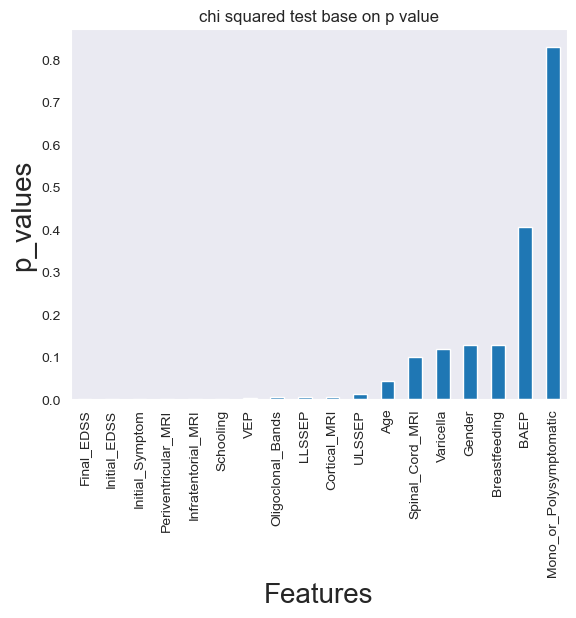

In [49]:
p_value.plot(kind="bar")
plt.xlabel("Features",fontsize=20)
plt.ylabel("p_values",fontsize=20)
plt.title("chi squared test base on p value")
plt.show()

The p values of the following features is not less than 0.05:
- Mono_or_polysymptomatic feature
- BAEP
- Breastfeeding
- Varicella
- Spinal_Cord_MRI

Therefore, those features does not have significance on the target variable. So we will select Final_EDSS, Initial_EDSS, Initial_Symptom, Petriventricular_MRI, Infratentorial_MRI, Schooling, VEP, Oligoclonal_Bands, LLSSEP, and ULSSEP for further machine learning modeling. 

In [50]:
df.drop('Mono_or_Polysymptomatic', axis=1, inplace=True)
df.drop('BAEP', axis=1, inplace=True)
df.drop('Breastfeeding', axis=1, inplace=True)
df.drop('Gender', axis=1, inplace=True)
df.drop('Varicella', axis=1, inplace=True)
df.drop('Spinal_Cord_MRI', axis=1, inplace=True)
df.tail()

,Age,Schooling,Initial_Symptom,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Initial_EDSS,Final_EDSS,group
268,31,8.0,9.0,0,0,0,0,0,0,0,0.0,0.0,2
269,21,15.0,5.0,1,0,0,0,0,0,0,0.0,0.0,2
270,19,12.0,13.0,0,1,1,1,0,0,0,0.0,0.0,2
271,32,15.0,15.0,1,1,1,1,1,1,1,0.0,0.0,2
272,77,6.0,2.0,0,0,1,0,0,0,0,0.0,0.0,2


## D. Partitioning a dataset into training and test data

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test =train_test_split(X, y,
                                                   test_size=0.3,
                                                   random_state=0,
                                                   stratify=y)

## D. Feature Scaling

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()

In [55]:
X_train = scaler.fit_transform(X_train)

In [56]:
X_test = scaler.transform(X_test)

## E. Model Development

### 1. Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn import metrics

In [58]:
lr = LogisticRegression()

In [59]:
lr.fit(X_train, y_train)

LogisticRegression()

<AxesSubplot:title={'center':'Feature Importance'}>

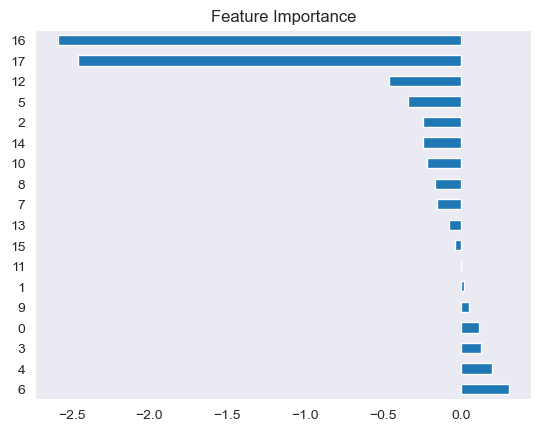

In [60]:
importance = lr.coef_[0]
feat_importances = pd.Series(importance)
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')

In [61]:
lr_pred = lr.predict(X_test)

In [62]:
cm = pd.DataFrame(confusion_matrix(y_test, lr_pred))
cm['Total'] = np.sum(cm, axis=1)
cm = cm.append(np.sum(cm, axis=0), ignore_index=True)
cm.columns = ['Predicted No', 'Predicted Yes', 'Total']
cm = cm.set_index([['Actual No', 'Actual Yes', 'Total']])
print(cm)

            Predicted No  Predicted Yes  Total
Actual No             38              0     38
Actual Yes             0             44     44
Total                 38             44     82


In [63]:
target_names = ['CDMS', 'Non-CDMS']
print(classification_report(y_test, lr_pred, target_names=target_names))

              precision    recall  f1-score   support

        CDMS       1.00      1.00      1.00        38
    Non-CDMS       1.00      1.00      1.00        44

    accuracy                           1.00        82
   macro avg       1.00      1.00      1.00        82
weighted avg       1.00      1.00      1.00        82



### 2. Decision Tree

In [64]:
dt = DecisionTreeClassifier()

In [65]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [66]:
print(dt.feature_importances_)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


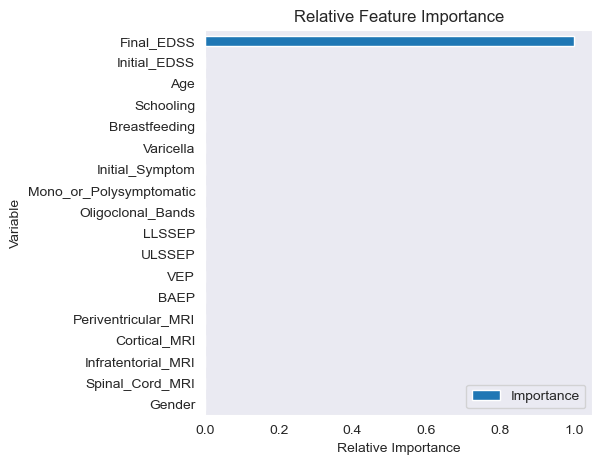

In [67]:
df_imp = pd.DataFrame({'Importance': list(dt.feature_importances_)}, index=X.columns)
df_imp_sorted = df_imp.sort_values(by=('Importance'), ascending=True)
df_imp_sorted.plot.barh(figsize=(5,5))
plt.title('Relative Feature Importance')
plt.xlabel('Relative Importance')
plt.ylabel('Variable')
plt.legend(loc=4)
plt.show()

It looks like that the attribute Initial_EDSS was the only driver in this classification problem.

In [68]:
dt_pred = dt.predict(X_test)

In [69]:
cm = pd.DataFrame(confusion_matrix(y_test, dt_pred))
cm['Total'] = np.sum(cm, axis=1)
cm = cm.append(np.sum(cm, axis=0), ignore_index=True)
cm.columns = ['Predicted No', 'Predicted Yes', 'Total']
cm = cm.set_index([['Actual No', 'Actual Yes', 'Total']])
print(cm)

            Predicted No  Predicted Yes  Total
Actual No             38              0     38
Actual Yes             0             44     44
Total                 38             44     82


In [70]:
target_names = ['CDMS', 'Non-CDMS']
print(classification_report(y_test, dt_pred, target_names=target_names))

              precision    recall  f1-score   support

        CDMS       1.00      1.00      1.00        38
    Non-CDMS       1.00      1.00      1.00        44

    accuracy                           1.00        82
   macro avg       1.00      1.00      1.00        82
weighted avg       1.00      1.00      1.00        82



### 3. Random Forest

In [71]:
forest = RandomForestClassifier()

In [72]:
forest.fit(X_train, y_train)

RandomForestClassifier()

In [73]:
print(forest.feature_importances_)

[0.00465154 0.00965971 0.02103006 0.00748505 0.01795918 0.02048152
 0.00350052 0.01217851 0.00569089 0.00214938 0.01396854 0.00172658
 0.0655982  0.00289453 0.02647798 0.00228542 0.36405277 0.41820962]


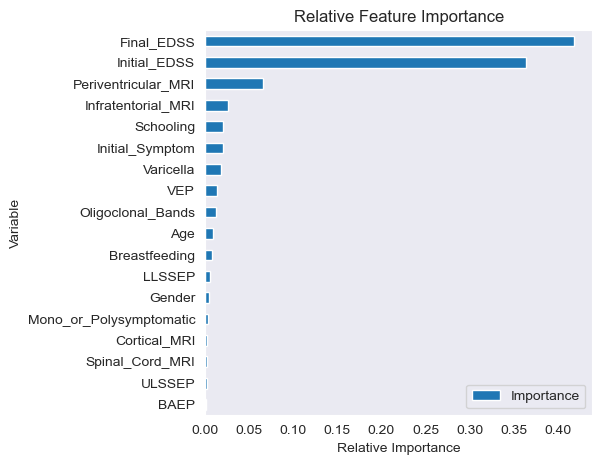

In [74]:
df_imp = pd.DataFrame({'Importance': list(forest.feature_importances_)}, index=X.columns)
df_imp_sorted = df_imp.sort_values(by=('Importance'), ascending=True)
df_imp_sorted.plot.barh(figsize=(5,5))
plt.title('Relative Feature Importance')
plt.xlabel('Relative Importance')
plt.ylabel('Variable')
plt.legend(loc=4)
plt.show()

From the figure above we can see that Final_EDSS, Initial_EDSS, Periventricular_MRI, and Infratentorial_MRI are the main drivers of predicting whether patients belong to group 1 or 2.

In [75]:
forest_pred = forest.predict(X_test)

In [76]:
cm = pd.DataFrame(confusion_matrix(y_test, forest_pred))
cm['Total'] = np.sum(cm, axis=1)
cm = cm.append(np.sum(cm, axis=0), ignore_index=True)
cm.columns = ['Predicted No', 'Predicted Yes', 'Total']
cm = cm.set_index([['Actual No', 'Actual Yes', 'Total']])
print(cm)

            Predicted No  Predicted Yes  Total
Actual No             38              0     38
Actual Yes             0             44     44
Total                 38             44     82


In [77]:
target_names = ['CDMS', 'Non-CDMS']
print(classification_report(y_test, forest_pred, target_names=target_names))

              precision    recall  f1-score   support

        CDMS       1.00      1.00      1.00        38
    Non-CDMS       1.00      1.00      1.00        44

    accuracy                           1.00        82
   macro avg       1.00      1.00      1.00        82
weighted avg       1.00      1.00      1.00        82



## F. GridSearchCV

In [78]:
from sklearn.model_selection import GridSearchCV

### 1. Logisitic Regression

In [79]:
grid_lr = {'penalty': ['l1', 'l2'], 
        'C': np.linspace(1, 10, 10), 
        'solver': ['liblinear']}

In [80]:
model_lr = GridSearchCV(LogisticRegression(solver='liblinear'), grid_lr, scoring='f1', cv=5)

In [81]:
model_lr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='f1')

In [82]:
best_parameters = model_lr.best_params_
print(best_parameters)

{'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}


We have found the combination of hyperparameters that maximise the f1 score.

### 2. Decision Tree

In [83]:
grid_dt = {'criterion': ['gini', 'entropy'], 
           'min_weight_fraction_leaf': np.linspace(0.0, 0.5, 10), 
           'min_impurity_decrease': np.linspace(0.0, 1.0, 10), 
           'class_weight': [None, 'balanced']}

In [84]:
model_dt = GridSearchCV(DecisionTreeClassifier(), grid_dt, scoring='f1', cv=5)

In [85]:
model_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'min_impurity_decrease': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'min_weight_fraction_leaf': array([0.        , 0.05555556, 0.11111111, 0.16666667, 0.22222222,
       0.27777778, 0.33333333, 0.38888889, 0.44444444, 0.5       ])},
             scoring='f1')

In [86]:
best_parameters = model_dt.best_params_
print(best_parameters)

{'class_weight': None, 'criterion': 'gini', 'min_impurity_decrease': 0.0, 'min_weight_fraction_leaf': 0.0}


### 3. Random Forest

In [93]:
grid_rf = {'n_estimators': [10, 100, 200],
           'max_depth': [3,5,10,None],
           'max_features':[1,3,5,7],
           'min_samples_leaf':[1,2,3]}

In [94]:
model_rf = GridSearchCV(RandomForestClassifier(), grid_rf, scoring='f1', cv=5,error_score="raise")

In [95]:
model_rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise', estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 10, None],
                         'max_features': [1, 3, 5, 7],
                         'min_samples_leaf': [1, 2, 3],
                         'n_estimators': [10, 100, 200]},
             scoring='f1')

In [96]:
best_parameters = model_rf.best_params_
print(best_parameters)

{'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 3, 'n_estimators': 100}
